In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import keras

In [140]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

In [141]:
train_images.shape

(60000, 28, 28)

In [144]:
def preprocess(images, normalization=255):
    dims = images.shape
    if len(dims) < 3:
        return images
    return images.reshape((dims[0], dims[1]*dims[2])).astype('float32') / normalization
train_images = preprocess(train_images)
test_images = preprocess(test_images)

In [145]:
train_labels = keras.utils.to_categorical(train_labels)
test_labels = keras.utils.to_categorical(test_labels)

In [164]:
network = keras.models.Sequential()
network.add(keras.layers.Dense(512, activation='relu', input_shape=(28*28,)))
network.add(keras.layers.Dense(10, activation='softmax'))

In [165]:
network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [166]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 1s 17us/step - loss: 0.2578 - acc: 0.9251
Epoch 2/5
60000/60000 [==============================] - 1s 15us/step - loss: 0.1028 - acc: 0.9702
Epoch 3/5
60000/60000 [==============================] - 1s 15us/step - loss: 0.0689 - acc: 0.9795
Epoch 4/5
60000/60000 [==============================] - 1s 15us/step - loss: 0.0502 - acc: 0.9852
Epoch 5/5
60000/60000 [==============================] - 1s 16us/step - loss: 0.0371 - acc: 0.9887


In [167]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print 'test_acc:', test_acc
print 'test_loss:', test_loss

10000/10000 [==============================] - 0s 28us/step
test_acc: 0.9798
test_loss: 0.06439646194365341


In [168]:
network.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_18 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


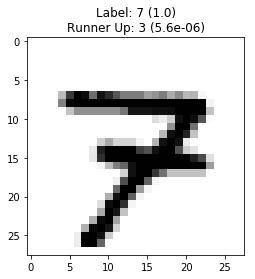

In [169]:
d_idx = np.random.randint(test_images.shape[0])
digit = test_images[d_idx]
label_probs = network.predict(np.array([digit]))
labels = np.argsort(label_probs)[0]
label = labels[-1]
confidence = label_probs[0][label]
plt.imshow(digit.reshape((28, 28)), cmap=plt.cm.binary)
plt.title("Label: {} ({:.2})\nRunner Up: {} ({:.2})".format(label, confidence, labels[-2], label_probs[0][labels[-2]]));

In [173]:
print np.maximum(3, -3)
print np.max((3, -3))

3
3
